In [152]:

import sys
import pickle
import pprint 
pp = pprint.PrettyPrinter(indent=4)
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary',"total_stock_value",'expenses','other','total_payments'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [50]:
# how many email files there is ? 
import numpy as np
import glob
import os
import os.path
import re
reobj = re.compile(r"\b[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,6}\b", re.IGNORECASE)
#print 

def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text 


def count_froms_and_tos (path):
    path = '/Users/lucas/Documents/learning_online/Udacity/DAND/P5 Intro to ML/Mini Projects/ud120-projects/final_project/emails_by_address/'
    count = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    count_from = 0
    count_to = 0
    email_adresses_from = []
    email_adresses_to = []
    for name_file in count:
        
        if name_file.startswith('from_'):
            count_from += 1
            email_adresses_from.append(remove_prefix(re.findall(reobj, name_file.decode('utf-8'))[0],'from_'))
        elif name_file.startswith('to_'):
            count_to += 1
            email_adresses_to.append(remove_prefix(re.findall(reobj, name_file.decode('utf-8'))[0],'to_'))
    
    return count_from,count_to,email_adresses_from,email_adresses_to

    
count_from,count_to,email_adresses_from,email_adresses_to = count_froms_and_tos('pepe')

print ' # from emails adresses :', count_from
print ' # to emails adresses :', count_to

print 'there is',sum(np.in1d(email_adresses_from,email_adresses_to)),'matches between email_adresses_from and email_adresses_to'
    
    



 # from emails adresses : 2331
 # to emails adresses : 2331
there is 2331 matches between email_adresses_from and email_adresses_to


In [17]:
pprint.pprint(my_dataset)

{'ALLEN PHILLIP K': {'bonus': 4175000,
                     'deferral_payments': 2869717,
                     'deferred_income': -3081055,
                     'director_fees': 'NaN',
                     'email_address': 'phillip.allen@enron.com',
                     'exercised_stock_options': 1729541,
                     'expenses': 13868,
                     'from_messages': 2195,
                     'from_poi_to_this_person': 47,
                     'from_this_person_to_poi': 65,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 304805,
                     'other': 152,
                     'poi': False,
                     'restricted_stock': 126027,
                     'restricted_stock_deferred': -126027,
                     'salary': 201955,
                     'shared_receipt_with_poi': 1407,
                     'to_messages': 2902,
                     'total_payments': 4484442,
                     'total_stock_value': 17295

In [218]:
pprint.pprint(my_dataset)

{'ALLEN PHILLIP K': {'bonus': 4175000,
                     'deferral_payments': 2869717,
                     'deferred_income': -3081055,
                     'director_fees': 'NaN',
                     'email_address': 'phillip.allen@enron.com',
                     'exercised_stock_options': 1729541,
                     'expenses': 13868,
                     'from_messages': 2195,
                     'from_poi_to_this_person': 47,
                     'from_this_person_to_poi': 65,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 304805,
                     'other': 152,
                     'poi': False,
                     'restricted_stock': 126027,
                     'restricted_stock_deferred': -126027,
                     'salary': 201955,
                     'shared_receipt_with_poi': 1407,
                     'to_messages': 2902,
                     'total_payments': 4484442,
                     'total_stock_value': 17295

In [84]:
import pandas 
my_dataset_df = pandas.DataFrame.from_dict(my_dataset,orient='index')
my_dataset_df.replace('NaN',np.nan, inplace=True)

I see lots of NaN, thought there where replaced by 0. 
Lets find where was that --> it's in feature format, a function that is not yet passed

In [183]:
my_dataset_df

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,...,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,NaN,2660303.0,NaN,False,NaN,-1386055.0,1586055.0,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,...,NaN,NaN,69.0,NaN,False,NaN,-201641.0,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818.0,NaN,684694.0,860136.0,1599641.0,NaN,NaN,NaN,NaN,1599641.0,...,NaN,NaN,874.0,NaN,False,NaN,NaN,93750.0,NaN,NaN
BECK SALLY W,231330.0,7315.0,NaN,969068.0,NaN,700000.0,126027.0,2639.0,NaN,126027.0,...,NaN,4343.0,566.0,386.0,False,NaN,NaN,NaN,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,NaN,1110705.0,...,NaN,484.0,210698.0,108.0,True,NaN,-2334434.0,NaN,tim.belden@enron.com,228.0
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,3285.0,NaN,NaN,NaN,44093.0,-44093.0,...,NaN,NaN,NaN,NaN,False,3285.0,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582.0,NaN,NaN,228474.0,1624396.0,NaN,869220.0,NaN,NaN,2493616.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


In [145]:
import collections
import pprint
pp = pprint.PrettyPrinter(indent=4)
poi_df = my_dataset_df.loc[my_dataset_df['poi'] == 1]
non_poi_df = my_dataset_df.loc[my_dataset_df['poi'] == 0]
pct_dict = collections.defaultdict(dict)
for column in my_dataset_df.columns.values:
    pct_non_nan_total =  round(my_dataset_df[column].count()/float(len(my_dataset_df[column])),3)
    pct_non_nan_poi = poi_df[column].count()/float(len(poi_df[column]))
    pct_non_nan_non_poi = non_poi_df[column].count()/float(len(non_poi_df[column]))
    
    dict_for_column = {"pct_non_nan_total":pct_non_nan_total,
                      "pct_non_nan_poi":pct_non_nan_poi,
                      "pct_non_nan_non_poi":pct_non_nan_non_poi}
    
    pct_dict[column]= dict_for_column

pct_df = pandas.DataFrame.from_dict(pct_dict,orient='index')
    

    

In [148]:
pct_df[['pct_non_nan_total','pct_non_nan_poi','pct_non_nan_non_poi']]

,pct_non_nan_total,pct_non_nan_poi,pct_non_nan_non_poi
bonus,0.562,0.888889,0.515625
deferral_payments,0.267,0.277778,0.265625
deferred_income,0.336,0.611111,0.296875
director_fees,0.116,0.000000,0.132812
email_address,0.760,1.000000,0.726562
exercised_stock_options,0.699,0.666667,0.703125
expenses,0.651,1.000000,0.601562
from_messages,0.589,0.777778,0.562500
from_poi_to_this_person,0.589,0.777778,0.562500
from_this_person_to_poi,0.589,0.777778,0.562500


In [162]:

import sys
import pickle
import pprint 
pp = pprint.PrettyPrinter(indent=4)
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary',"total_stock_value",'expenses','other','total_payments'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [165]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True,remove_any_zeroes = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

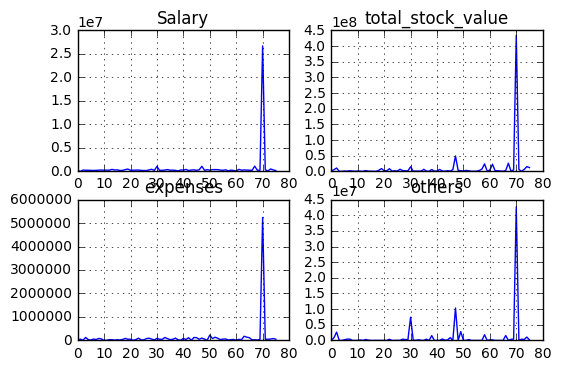

In [182]:
import matplotlib.pyplot as plt


plt.figure(1)

# linear
plt.subplot(221)
plt.plot([point[1] for point in data])
plt.title('Salary')
plt.grid(True)

# log
plt.subplot(222)
plt.plot([point[2] for point in data])
plt.title('total_stock_value')
plt.grid(True)

# log
plt.subplot(223)
plt.plot([point[3] for point in data])
plt.title('expenses')
plt.grid(True)

# log
plt.subplot(224)
plt.plot([point[4] for point in data])
plt.title('others')
plt.grid(True)

plt.show()

OK so there is an otlier for sure (~around postion 70)


In [188]:
my_dataset_df.sort_values('salary', axis=0, ascending=0, inplace=0)

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,...,83925000.0,NaN,42667589.0,NaN,False,1398517.0,-27992891.0,48521928.0,NaN,NaN
SKILLING JEFFREY K,1111258.0,3627.0,NaN,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,NaN,26093672.0,...,NaN,108.0,22122.0,30.0,True,NaN,NaN,1920000.0,jeff.skilling@enron.com,88.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,NaN,14622185.0,...,2000000.0,21.0,7427621.0,6.0,False,NaN,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
PICKERING MARK R,655037.0,898.0,NaN,1386690.0,28798.0,300000.0,NaN,728.0,NaN,28798.0,...,400000.0,67.0,NaN,0.0,False,NaN,NaN,NaN,mark.pickering@enron.com,7.0
WHALLEY LAWRENCE G,510364.0,6019.0,NaN,4677574.0,3282960.0,3000000.0,2796177.0,3920.0,NaN,6079137.0,...,NaN,556.0,301026.0,24.0,False,NaN,NaN,808346.0,greg.whalley@enron.com,186.0
DERRICK JR. JAMES V,492375.0,2181.0,NaN,550981.0,8831913.0,800000.0,1787380.0,1401.0,-1787380.0,8831913.0,...,NaN,909.0,7482.0,20.0,False,NaN,-1284000.0,484000.0,james.derrick@enron.com,64.0
FASTOW ANDREW S,440698.0,NaN,NaN,2424083.0,NaN,1300000.0,1794412.0,NaN,NaN,1794412.0,...,NaN,NaN,277464.0,NaN,True,NaN,-1386055.0,1736055.0,andrew.fastow@enron.com,NaN
SHERRIFF JOHN R,428780.0,3187.0,NaN,4335388.0,1835558.0,1500000.0,1293424.0,2103.0,NaN,3128982.0,...,NaN,92.0,1852186.0,23.0,False,NaN,NaN,554422.0,john.sherriff@enron.com,28.0
RICE KENNETH D,420636.0,905.0,NaN,505050.0,19794175.0,1750000.0,2748364.0,864.0,NaN,22542539.0,...,NaN,18.0,174839.0,4.0,True,NaN,-3504386.0,1617011.0,ken.rice@enron.com,42.0


So we've got to remove total line 

## Removing total line form initial data_dict

In [207]:

import sys
import pickle
import pprint 
pp = pprint.PrettyPrinter(indent=4)
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary',"total_stock_value",'expenses','other','total_payments'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
## remove Total line
data_dict.pop('TOTAL')
my_dataset = data_dict

In [208]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True,remove_any_zeroes = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [209]:
data, len(data)

(array([[  0.00000000e+00,   2.01955000e+05,   1.72954100e+06,
           1.38680000e+04,   1.52000000e+02,   4.48444200e+06],
        [  0.00000000e+00,   4.77000000e+02,   5.24348700e+06,
           5.63010000e+04,   8.64523000e+05,   9.16197000e+05],
        [  0.00000000e+00,   2.67102000e+05,   1.06232580e+07,
           1.12000000e+04,   2.66030300e+06,   5.63434300e+06],
        [  0.00000000e+00,   2.39671000e+05,   6.30140000e+04,
           1.29142000e+05,   6.90000000e+01,   8.27696000e+05],
        [  0.00000000e+00,   2.31330000e+05,   1.26027000e+05,
           3.71720000e+04,   5.66000000e+02,   9.69068000e+05],
        [  1.00000000e+00,   2.13999000e+05,   1.11070500e+06,
           1.73550000e+04,   2.10698000e+05,   5.50163000e+06],
        [  0.00000000e+00,   1.87922000e+05,   6.59249000e+05,
           5.91750000e+04,   4.27316000e+05,   6.18850000e+05],
        [  0.00000000e+00,   2.13625000e+05,   1.84381600e+06,
           3.85590000e+04,   4.25688000e+05,   2

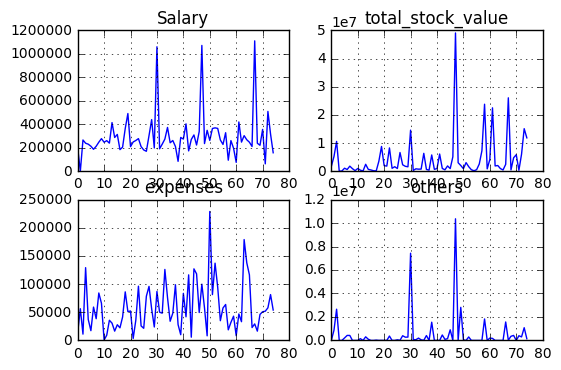

In [204]:
import matplotlib.pyplot as plt


plt.figure(1)

# linear
plt.subplot(221)
plt.plot([point[1] for point in data])
plt.title('Salary')
plt.grid(True)

# log
plt.subplot(222)
plt.plot([point[2] for point in data])
plt.title('total_stock_value')
plt.grid(True)

# log
plt.subplot(223)
plt.plot([point[3] for point in data])
plt.title('expenses')
plt.grid(True)

# log
plt.subplot(224)
plt.plot([point[4] for point in data])
plt.title('others')
plt.grid(True)

plt.show()

## Clasifier creation

In [210]:
print labels,len(labels)

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] 75


In [212]:
print features,len(features)

[array([  2.01955000e+05,   1.72954100e+06,   1.38680000e+04,
         1.52000000e+02,   4.48444200e+06]), array([  4.77000000e+02,   5.24348700e+06,   5.63010000e+04,
         8.64523000e+05,   9.16197000e+05]), array([   267102.,  10623258.,     11200.,   2660303.,   5634343.]), array([  2.39671000e+05,   6.30140000e+04,   1.29142000e+05,
         6.90000000e+01,   8.27696000e+05]), array([  2.31330000e+05,   1.26027000e+05,   3.71720000e+04,
         5.66000000e+02,   9.69068000e+05]), array([  213999.,  1110705.,    17355.,   210698.,  5501630.]), array([ 187922.,  659249.,   59175.,  427316.,  618850.]), array([  213625.,  1843816.,    38559.,   425688.,  2047593.]), array([  2.48546000e+05,   9.54354000e+05,   8.42080000e+04,
         2.72000000e+02,   2.01483500e+06]), array([  2.78601000e+05,   2.52055000e+05,   6.59070000e+04,
         1.62100000e+03,   2.66958900e+06]), array([  2.48017000e+05,   1.01450500e+06,   6.00000000e+02,
         1.21500000e+03,   1.05463700e+06]), a

In [211]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [216]:
clf.fit(features,labels)

GaussianNB()